In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
file_to_load = "Data/StudentsPerformance.csv"

In [3]:
ny_df= pd.read_csv(file_to_load)

In [4]:
ny_df.head(10)
          

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [5]:
ny_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 43.0+ KB


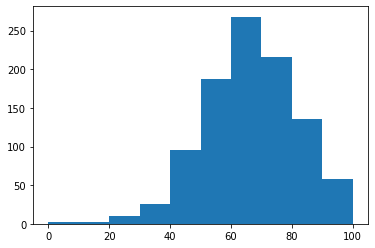

<Figure size 432x288 with 0 Axes>

In [62]:
plt.hist( ny_df['math score'])
plt.show()
plt.savefig('math.png')

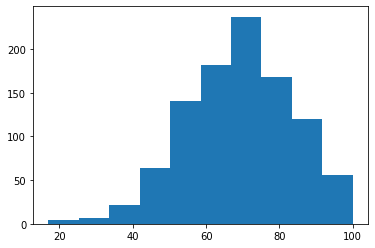

<Figure size 432x288 with 0 Axes>

In [7]:
plt.hist( ny_df['reading score'])
plt.show()
plt.savefig('reading.png')

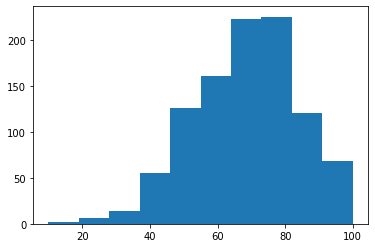

<Figure size 432x288 with 0 Axes>

In [8]:
plt.hist( ny_df['writing score'])
plt.show()
plt.savefig('writing.png')

In [9]:
ny_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
median1 = ny_df['math score'].median()
median1

66.0

In [11]:
median2 = ny_df['reading score'].median()
median2

70.0

In [12]:
median3 = ny_df['writing score'].median()
median3

69.0

In [13]:
ny_df.groupby(['math score']).nunique()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
math score,,,,,,,,
0,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1
18,1,1,1,1,1,1,1,1
19,1,1,1,1,1,1,1,1
22,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
96,2,1,2,1,1,1,3,3
97,2,5,4,1,2,1,6,6
98,2,2,2,1,2,1,3,2


In [14]:
ny_df.groupby(['parental level of education']).count()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score
parental level of education,,,,,,,
associate's degree,222,222,222,222,222,222,222
bachelor's degree,118,118,118,118,118,118,118
high school,196,196,196,196,196,196,196
master's degree,59,59,59,59,59,59,59
some college,226,226,226,226,226,226,226
some high school,179,179,179,179,179,179,179


In [15]:
mean_scores = ny_df.groupby(['parental level of education','lunch','test preparation course'],as_index=False).mean()
mean_scores

,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,associate's degree,free/reduced,completed,68.482759,73.310345,73.310345
1,associate's degree,free/reduced,none,59.062500,64.229167,61.625000
2,associate's degree,standard,completed,73.660377,77.735849,78.735849
3,associate's degree,standard,none,68.967391,69.750000,68.043478
4,bachelor's degree,free/reduced,completed,66.764706,73.823529,75.705882
5,bachelor's degree,free/reduced,none,60.629630,65.851852,65.148148
6,bachelor's degree,standard,completed,77.103448,78.448276,80.448276
7,bachelor's degree,standard,none,70.666667,73.466667,72.888889
8,high school,free/reduced,completed,60.000000,65.458333,65.541667
9,high school,free/reduced,none,51.652174,57.478261,53.152174


In [16]:
mean_scores['combined scores'] = (mean_scores['math score'] + mean_scores['reading score'] + mean_scores['writing score']) / 3

In [17]:
mean_scores

,parental level of education,lunch,test preparation course,math score,reading score,writing score,combined scores
0,associate's degree,free/reduced,completed,68.482759,73.310345,73.310345,71.701149
1,associate's degree,free/reduced,none,59.062500,64.229167,61.625000,61.638889
2,associate's degree,standard,completed,73.660377,77.735849,78.735849,76.710692
3,associate's degree,standard,none,68.967391,69.750000,68.043478,68.920290
4,bachelor's degree,free/reduced,completed,66.764706,73.823529,75.705882,72.098039
5,bachelor's degree,free/reduced,none,60.629630,65.851852,65.148148,63.876543
6,bachelor's degree,standard,completed,77.103448,78.448276,80.448276,78.666667
7,bachelor's degree,standard,none,70.666667,73.466667,72.888889,72.340741
8,high school,free/reduced,completed,60.000000,65.458333,65.541667,63.666667
9,high school,free/reduced,none,51.652174,57.478261,53.152174,54.094203


In [18]:
advantaged_df = mean_scores[(mean_scores['parental level of education'].isin(["bachelor's degree" ,"master's degree"])) & (mean_scores['lunch'].isin(['standard'])) & (mean_scores['test preparation course'].isin(['completed']))]                    

In [19]:
advantaged_df

,parental level of education,lunch,test preparation course,math score,reading score,writing score,combined scores
6,bachelor's degree,standard,completed,77.103448,78.448276,80.448276,78.666667
14,master's degree,standard,completed,78.000000,84.375000,85.500000,82.625000


In [20]:
disadvantaged_df = mean_scores[(mean_scores['parental level of education'].isin(['high school' ,'some high school', 'some college', "associate's degree"])) & (mean_scores['lunch'].isin(['standard','free/reduced'])) & (mean_scores['test preparation course'].isin(['completed','none']))]

In [21]:
disadvantaged_df

,parental level of education,lunch,test preparation course,math score,reading score,writing score,combined scores
0,associate's degree,free/reduced,completed,68.482759,73.310345,73.310345,71.701149
1,associate's degree,free/reduced,none,59.062500,64.229167,61.625000,61.638889
2,associate's degree,standard,completed,73.660377,77.735849,78.735849,76.710692
3,associate's degree,standard,none,68.967391,69.750000,68.043478,68.920290
8,high school,free/reduced,completed,60.000000,65.458333,65.541667,63.666667
9,high school,free/reduced,none,51.652174,57.478261,53.152174,54.094203
10,high school,standard,completed,68.750000,69.625000,69.937500,69.437500
11,high school,standard,none,65.563830,66.372340,63.659574,65.198582
16,some college,free/reduced,completed,60.730769,68.961538,69.384615,66.358974
17,some college,free/reduced,none,59.830189,63.169811,60.924528,61.308176


In [22]:
bachelor_population = ny_df[(ny_df['parental level of education'] == 'bachelor\'s degree') & (ny_df.lunch == "standard") & 
      (ny_df['test preparation course'] == 'completed')]

master_populaton = ny_df[(ny_df['parental level of education'] == 'master\'s degree') & (ny_df.lunch == "standard") & 
      (ny_df['test preparation course'] == 'completed')]
combine_advantage_population =[bachelor_population,master_populaton]
advantage_population = pd.concat(combine_advantage_population)


In [23]:
advantage_population['Combined Scores'] = (advantage_population['math score'] + advantage_population['reading score'] + advantage_population['writing score']) / 3
round(advantage_population,2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Combined Scores
77,male,group A,bachelor's degree,standard,completed,80,78,81,79.67
101,male,group D,bachelor's degree,standard,completed,68,74,74,72.00
114,female,group E,bachelor's degree,standard,completed,99,100,100,99.67
120,female,group C,bachelor's degree,standard,completed,79,92,89,86.67
148,female,group D,bachelor's degree,standard,completed,68,75,81,74.67
165,female,group C,bachelor's degree,standard,completed,96,100,100,98.67
234,male,group C,bachelor's degree,standard,completed,83,82,84,83.00
312,male,group D,bachelor's degree,standard,completed,67,61,68,65.33
314,female,group C,bachelor's degree,standard,completed,59,64,75,66.00
347,female,group C,bachelor's degree,standard,completed,77,94,95,88.67


In [24]:
advantage_population.count()

gender                         37
race/ethnicity                 37
parental level of education    37
lunch                          37
test preparation course        37
math score                     37
reading score                  37
writing score                  37
Combined Scores                37
dtype: int64

In [25]:
disadvantage_population = ny_df[(ny_df['parental level of education'].isin(['high school' ,'some high school', 'some college', "associate's degree"])) & (ny_df['lunch'].isin(['standard','free/reduced'])) & (ny_df['test preparation course'].isin(['completed','none']))]
disadvantage_population.count()

gender                         823
race/ethnicity                 823
parental level of education    823
lunch                          823
test preparation course        823
math score                     823
reading score                  823
writing score                  823
dtype: int64

In [26]:
disadvantage_population['Combined Scores'] = (disadvantage_population['math score'] + disadvantage_population['reading score'] + disadvantage_population['writing score']) / 3
round(disadvantage_population,2)

c:\users\abifabi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Combined Scores
1,female,group C,some college,standard,completed,69,90,88,82.33
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33
5,female,group B,associate's degree,standard,none,71,83,78,77.33
6,female,group B,some college,standard,completed,88,95,92,91.67
...,...,...,...,...,...,...,...,...,...
994,male,group A,high school,standard,none,63,63,62,62.67
996,male,group C,high school,free/reduced,none,62,55,55,57.33
997,female,group C,high school,free/reduced,completed,59,71,65,65.00
998,female,group D,some college,standard,completed,68,78,77,74.33


In [27]:
partial_advantage1 = mean_scores[(mean_scores['parental level of education'].isin(["master's degree", "bachelor's degree"])) & (mean_scores['lunch'].isin(['free/reduced'])) & (mean_scores['test preparation course'].isin(['completed','none']))]
partial_advantage1.head(50)

,parental level of education,lunch,test preparation course,math score,reading score,writing score,combined scores
4,bachelor's degree,free/reduced,completed,66.764706,73.823529,75.705882,72.098039
5,bachelor's degree,free/reduced,none,60.629630,65.851852,65.148148,63.876543
12,master's degree,free/reduced,completed,65.666667,74.166667,76.500000,72.111111
13,master's degree,free/reduced,none,56.666667,66.416667,63.250000,62.111111


In [28]:
partial_population1 = ny_df[(ny_df['parental level of education'].isin(["master's degree", "bachelor's degree"])) & (ny_df['lunch'].isin(['free/reduced'])) & (ny_df['test preparation course'].isin(['completed','none']))]
partial_population1.count()

gender                         68
race/ethnicity                 68
parental level of education    68
lunch                          68
test preparation course        68
math score                     68
reading score                  68
writing score                  68
dtype: int64

In [29]:
partial_population1['Combined Scores'] = (partial_population1['math score'] + partial_population1['reading score'] + partial_population1['writing score']) / 3
round(partial_population1,2)

c:\users\abifabi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Combined Scores
18,male,group C,master's degree,free/reduced,completed,46,42,46,44.67
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80,75.00
25,male,group A,master's degree,free/reduced,none,73,74,72,73.00
32,female,group E,master's degree,free/reduced,none,56,72,65,64.33
60,male,group E,bachelor's degree,free/reduced,completed,79,74,72,75.00
...,...,...,...,...,...,...,...,...,...
910,male,group D,bachelor's degree,free/reduced,none,50,42,48,46.67
913,female,group C,bachelor's degree,free/reduced,completed,47,62,66,58.33
933,male,group C,bachelor's degree,free/reduced,completed,70,75,74,73.00
940,male,group C,master's degree,free/reduced,completed,72,66,72,70.00


In [30]:
partial_advantage2 = mean_scores[(mean_scores['parental level of education'].isin(["master's degree", "bachelor's degree"])) & (mean_scores['lunch'].isin(['standard'])) & (mean_scores['test preparation course'].isin(['none']))]
partial_advantage2

,parental level of education,lunch,test preparation course,math score,reading score,writing score,combined scores
7,bachelor's degree,standard,none,70.666667,73.466667,72.888889,72.340741
15,master's degree,standard,none,74.925926,77.222222,77.925926,76.691358


In [47]:
partial_population2 = ny_df[(ny_df['parental level of education'].isin(["master's degree", "bachelor's degree"])) & (ny_df['lunch'].isin(['standard'])) & (ny_df['test preparation course'].isin(['none']))]
partial_population2.count()

gender                         72
race/ethnicity                 72
parental level of education    72
lunch                          72
test preparation course        72
math score                     72
reading score                  72
writing score                  72
dtype: int64

In [32]:
partial_population2['Combined Scores'] = (partial_population2['math score'] + partial_population2['reading score'] + partial_population2['writing score']) / 3
round(partial_population2,2)

c:\users\abifabi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Combined Scores
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
2,female,group B,master's degree,standard,none,90,95,93,92.67
14,female,group A,master's degree,standard,none,50,53,58,53.67
27,female,group C,bachelor's degree,standard,none,67,69,75,70.33
29,female,group D,master's degree,standard,none,62,70,75,69.00
...,...,...,...,...,...,...,...,...,...
901,female,group C,master's degree,standard,none,73,78,74,75.00
941,female,group D,master's degree,standard,none,78,91,96,88.33
957,female,group D,master's degree,standard,none,92,100,100,97.33
969,female,group B,bachelor's degree,standard,none,75,84,80,79.67


In [33]:

partial_advantage1 = mean_scores[(mean_scores['parental level of education'].isin(["master's degree", "bachelor's degree"])) & (mean_scores['lunch'].isin(['free/reduced'])) & (mean_scores['test preparation course'].isin(['completed','none']))]
partial_advantage1.head(50)


,parental level of education,lunch,test preparation course,math score,reading score,writing score,combined scores
4,bachelor's degree,free/reduced,completed,66.764706,73.823529,75.705882,72.098039
5,bachelor's degree,free/reduced,none,60.629630,65.851852,65.148148,63.876543
12,master's degree,free/reduced,completed,65.666667,74.166667,76.500000,72.111111
13,master's degree,free/reduced,none,56.666667,66.416667,63.250000,62.111111


In [34]:
partial_advantage2 = mean_scores[(mean_scores['parental level of education'].isin(["master's degree", "bachelor's degree"])) & (mean_scores['lunch'].isin(['standard','free/reduced'])) & (mean_scores['test preparation course'].isin(['none']))]
partial_advantage2.head(50)

,parental level of education,lunch,test preparation course,math score,reading score,writing score,combined scores
5,bachelor's degree,free/reduced,none,60.629630,65.851852,65.148148,63.876543
7,bachelor's degree,standard,none,70.666667,73.466667,72.888889,72.340741
13,master's degree,free/reduced,none,56.666667,66.416667,63.250000,62.111111
15,master's degree,standard,none,74.925926,77.222222,77.925926,76.691358


In [35]:
#combined partial score 
#partial_advantage2['combined scores'] = (partial_advantage['math score'] + partial_advantage['reading score'] + partial_advantage['writing score']) / 3
# round(partial_advantage,2)
#partial_advantage2

In [36]:
combined_disadvantage=[disadvantaged_df,partial_advantage1,partial_advantage2]
sample4 = pd.concat(combined_disadvantage)

In [37]:
combined_disadvantage_pop = [disadvantage_population,partial_population1,partial_population2]
no_advantage_population = pd.concat(combined_disadvantage_pop)

In [48]:
no_advantage_population

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Combined Scores
1,female,group C,some college,standard,completed,69,90,88,82.333333
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
5,female,group B,associate's degree,standard,none,71,83,78,77.333333
6,female,group B,some college,standard,completed,88,95,92,91.666667
...,...,...,...,...,...,...,...,...,...
901,female,group C,master's degree,standard,none,73,78,74,75.000000
941,female,group D,master's degree,standard,none,78,91,96,88.333333
957,female,group D,master's degree,standard,none,92,100,100,97.333333
969,female,group B,bachelor's degree,standard,none,75,84,80,79.666667


In [39]:
sample4

,parental level of education,lunch,test preparation course,math score,reading score,writing score,combined scores
0,associate's degree,free/reduced,completed,68.482759,73.310345,73.310345,71.701149
1,associate's degree,free/reduced,none,59.062500,64.229167,61.625000,61.638889
2,associate's degree,standard,completed,73.660377,77.735849,78.735849,76.710692
3,associate's degree,standard,none,68.967391,69.750000,68.043478,68.920290
8,high school,free/reduced,completed,60.000000,65.458333,65.541667,63.666667
9,high school,free/reduced,none,51.652174,57.478261,53.152174,54.094203
10,high school,standard,completed,68.750000,69.625000,69.937500,69.437500
11,high school,standard,none,65.563830,66.372340,63.659574,65.198582
16,some college,free/reduced,completed,60.730769,68.961538,69.384615,66.358974
17,some college,free/reduced,none,59.830189,63.169811,60.924528,61.308176


In [40]:
sample1 = advantaged_df['combined scores']
sample1

6     78.666667
14    82.625000
Name: combined scores, dtype: float64

In [41]:
sample2 = sample4['combined scores']
sample2

0     71.701149
1     61.638889
2     76.710692
3     68.920290
8     63.666667
9     54.094203
10    69.437500
11    65.198582
16    66.358974
17    61.308176
18    78.882353
19    67.479167
20    63.144928
21    53.640351
22    71.975309
23    66.828125
4     72.098039
5     63.876543
12    72.111111
13    62.111111
5     63.876543
7     72.340741
13    62.111111
15    76.691358
Name: combined scores, dtype: float64

In [42]:
combine_sample1 = advantage_population['Combined Scores']

In [43]:
combine_sample2 = no_advantage_population['Combined Scores']

In [44]:
t2, p2 = stats.ttest_ind(sample1, sample2)
print("t = " + str(t2))
print("p = " + str(p2))

t = 2.921020300041413
p = 0.007480838632764154


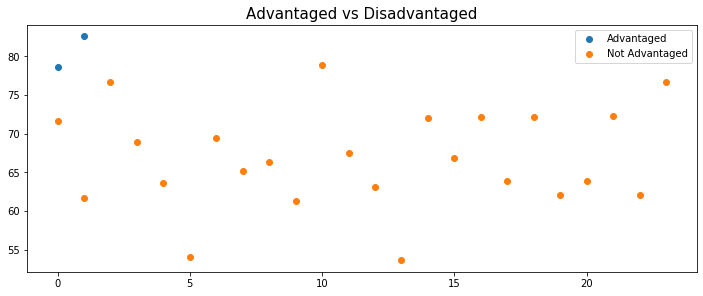

In [60]:
def gendata(loc1=0, loc2=0):
    sample1 = advantaged_df['combined scores']
    sample2 = disadvantaged_df['combined scores']
fig = plt.figure(figsize = (12,10))    
plt.subplot(2, 1, 1)
plt.scatter(range(len(sample1)), sample1, label="Advantaged")
plt.scatter(range(len(sample2)), sample2, label="Not Advantaged")
plt.legend()
plt.title('Advantaged vs Disadvantaged', fontdict = {'fontsize': 15})
plt.savefig('scatterplot.png')
#return sample1, sample2



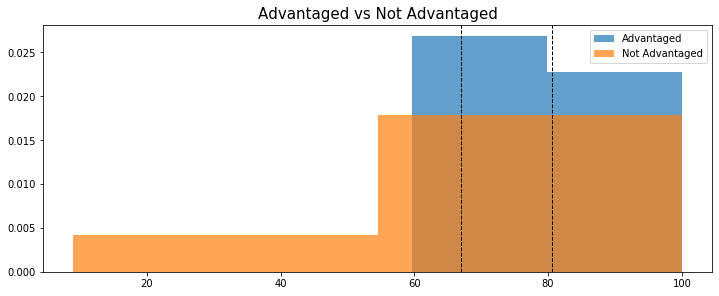

In [61]:
fig = plt.figure(figsize = (12,10))
plt.subplot(2, 1, 2)
plt.hist(combine_sample1, 2, density=True, alpha=0.7, label="Advantaged")
plt.hist(combine_sample2, 2, density=True, alpha=0.7, label="Not Advantaged")
plt.axvline(sample1.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(sample2.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()
plt.title('Advantaged vs Not Advantaged', fontdict = {'fontsize': 15})
plt.savefig('disvsadvsubplot.png')

In [52]:
math_sample1 = advantaged_df['math score']
math_sample1.mean()

77.55172413793103

In [53]:
math_sample2 = sample4["math score"]
math_sample2.mean()

64.18938125061572

In [56]:
reading_sample2 = sample4["reading score"]
reading_sample2.mean()

68.76928117575365

In [57]:
writing_sample2 = sample4["writing score"]
writing_sample2 .mean()

67.81657644559318

In [59]:
combine_sample2.mean()

67.31914157147803